  #### **Question 1: E-commerce Funnel Analysis and Insights**
                Task 2. Data Presentation:

        **STEPS In Data Presentation**
        1. [x] **Load and validate your CSV data**
        2. [x] **Create detailed funnel visualizations** showing performance over time
        3. [x] **Generate summary tables** with daily, weekly, and performance comparisons
        4. [x] **Provide advanced analytics** including drop-off rates and correlations
        5. [x] **Save results** for further use

In [33]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the CSV file (adjust the path as needed)
csv_file_path = r'C:\Users\saswa\OneDrive\Documents\Puffy\ecommerce_funnel_analysis.csv'
try:
    df = pd.read_csv(csv_file_path)
    print("✅ CSV file loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nColumn names:")
    print(df.columns.tolist())
except FileNotFoundError:
    print("❌ CSV file not found. Please check the file path.")
    print("Current working directory files:")
    import os

    print([f for f in os.listdir('.') if f.endswith('.csv')])

✅ CSV file loaded successfully!
Dataset shape: (15, 11)

Column names:
['event_date', 'stage_1_site_visit', 'stage_2_product_view', 'stage_3_add_to_cart', 'stage_4_checkout', 'stage_5_purchase', 'conv_rate_visit_to_product_view', 'conv_rate_product_to_cart', 'conv_rate_cart_to_checkout', 'conv_rate_checkout_to_purchase', 'overall_conversion_rate']


In [34]:
# Convert event_date to datetime
if 'event_date' in df.columns:
    df['event_date'] = pd.to_datetime(df['event_date'])
    print(f"Date range: {df['event_date'].min()} to {df['event_date'].max()}")
    print(f"Total days: {df['event_date'].nunique()}")

# Display basic statistics
print("\n📊 Dataset Overview:")
#display(df.describe())

# Check for any missing values
print("\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    display(missing_values[missing_values > 0])
else:
    print("✅ No missing values found")

Date range: 2023-05-30 00:00:00 to 2023-06-13 00:00:00
Total days: 15

📊 Dataset Overview:

🔍 Missing Values Check:
✅ No missing values found


In [35]:
# Define funnel stages based on your data columns
funnel_stages = {
    'Site Visit': 'stage_1_site_visit',
    'Product View': 'stage_2_product_view',
    'Add to Cart': 'stage_3_add_to_cart',
    'Checkout': 'stage_4_checkout',
    'Purchase': 'stage_5_purchase'
}

# Calculate overall funnel metrics
total_metrics = {}
conversion_rates = {}

for stage_name, column_name in funnel_stages.items():
    if column_name in df.columns:
        total_metrics[stage_name] = df[column_name].sum()

print("🏪 Overall Funnel Performance:")
print("=" * 50)
for stage_name, total_users in total_metrics.items():
    print(f"{stage_name:15}: {total_users:,} users")

# Calculate overall conversion rates
stages_list = list(total_metrics.keys())
for i in range(len(stages_list) - 1):
    current_stage = stages_list[i]
    next_stage = stages_list[i + 1]

    if total_metrics[current_stage] > 0:
        conv_rate = (total_metrics[next_stage] / total_metrics[current_stage]) * 100
        conversion_rates[f"{current_stage} → {next_stage}"] = conv_rate
        print(f"{current_stage} → {next_stage}: {conv_rate:.2f}%")

# Overall conversion rate
if total_metrics[stages_list[0]] > 0:
    overall_conv = (total_metrics[stages_list[-1]] / total_metrics[stages_list[0]]) * 100
    print(f"\n🎯 Overall Conversion Rate: {overall_conv:.2f}%")

🏪 Overall Funnel Performance:
Site Visit     : 5,404 users
Product View   : 3,319 users
Add to Cart    : 351 users
Checkout       : 261 users
Purchase       : 86 users
Site Visit → Product View: 61.42%
Product View → Add to Cart: 10.58%
Add to Cart → Checkout: 74.36%
Checkout → Purchase: 32.95%

🎯 Overall Conversion Rate: 1.59%


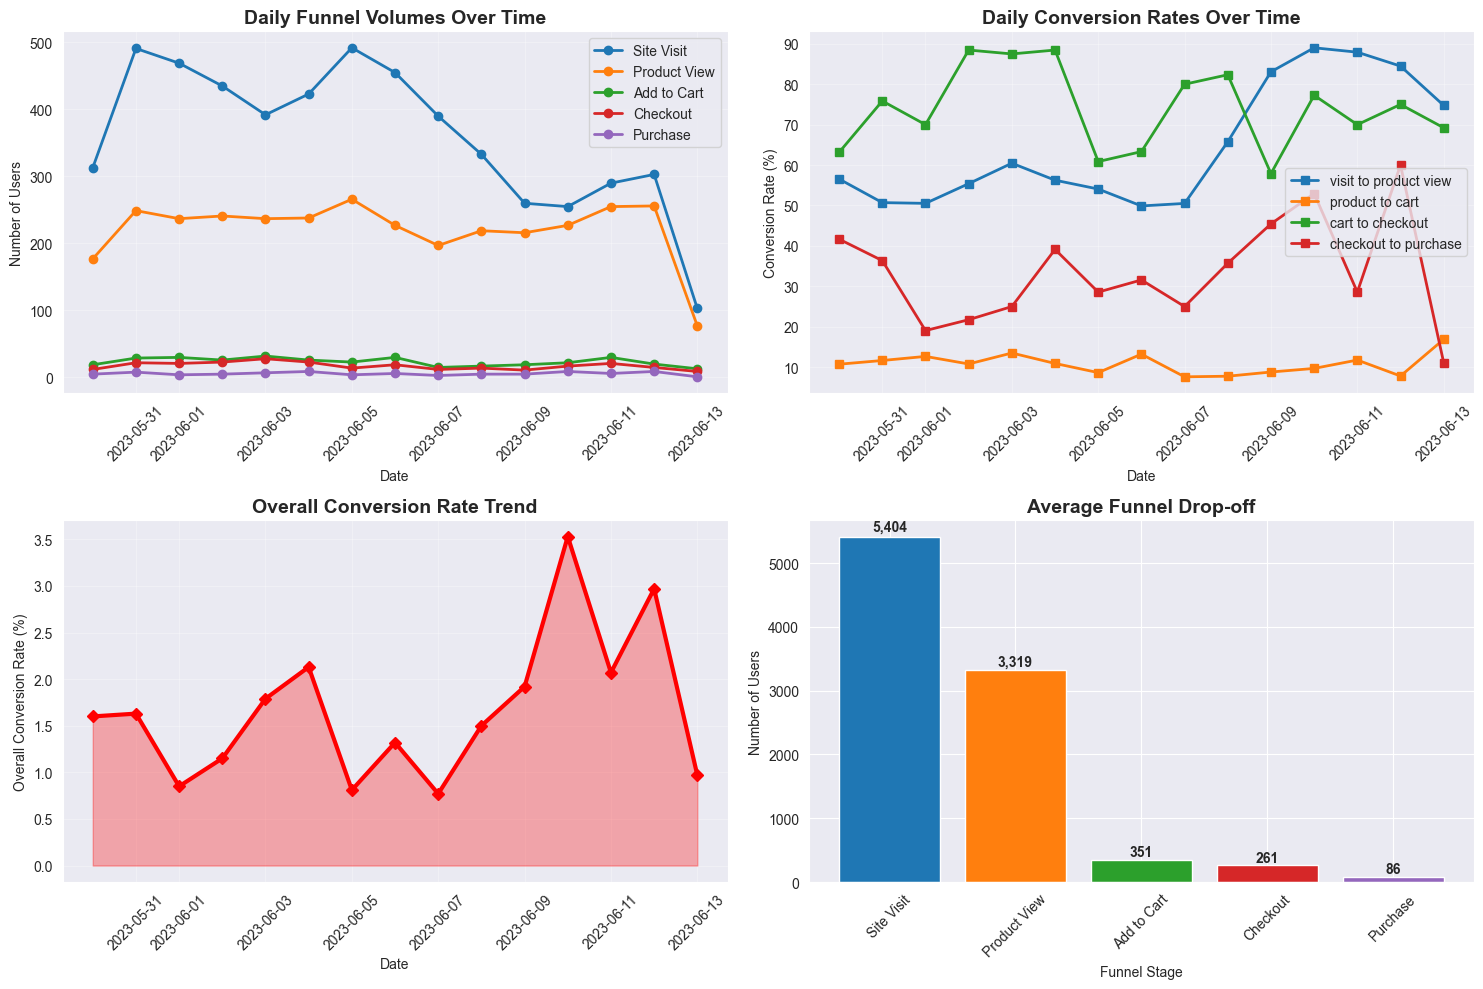

<Figure size 640x480 with 0 Axes>

In [36]:
# Create time series analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

# Plot 1: Daily funnel volumes
plt.subplot(2, 2, 1)
for stage_name, column_name in funnel_stages.items():
    if column_name in df.columns:
        plt.plot(df['event_date'], df[column_name], marker='o', label=stage_name, linewidth=2)

plt.title('Daily Funnel Volumes Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Daily conversion rates
plt.subplot(2, 2, 2)
conversion_columns = [col for col in df.columns if 'conv_rate' in col]
for col in conversion_columns:
    plt.plot(df['event_date'], df[col], marker='s', label=col.replace('conv_rate_', '').replace('_', ' '), linewidth=2)

plt.title('Daily Conversion Rates Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 3: Overall conversion rate trend
plt.subplot(2, 2, 3)
if 'overall_conversion_rate' in df.columns:
    plt.plot(df['event_date'], df['overall_conversion_rate'], marker='D', color='red', linewidth=3)
    plt.fill_between(df['event_date'], df['overall_conversion_rate'], alpha=0.3, color='red')

plt.title('Overall Conversion Rate Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Overall Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 4: Funnel drop-off visualization
plt.subplot(2, 2, 4)
avg_funnel = [total_metrics[stage] for stage in funnel_stages.keys() if stage in total_metrics]
stage_names = [stage for stage in funnel_stages.keys() if stage in total_metrics]

bars = plt.bar(range(len(avg_funnel)), avg_funnel,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'][:len(avg_funnel)])
plt.title('Average Funnel Drop-off', fontsize=14, fontweight='bold')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Users')
plt.xticks(range(len(stage_names)), stage_names, rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + height * 0.01,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
plt.savefig(r'C:\Users\saswa\OneDrive\Documents\Puffy\funnel_analysis.png')

In [37]:
from pandas.plotting import table
import pandas as pd

# Convert to datetime if not already
df['event_date'] = pd.to_datetime(df['event_date'])

# ---------- TABLE 1: DAILY PERFORMANCE SUMMARY ----------
summary_stats = df.groupby('event_date').agg({
    'stage_1_site_visit': 'sum',
    'stage_5_purchase': 'sum',
    'overall_conversion_rate': 'mean'
}).round(2)
summary_stats.columns = ['Daily Site Visits', 'Daily Purchases', 'Conversion Rate (%)']
summary_stats = summary_stats.tail(10)  # Show only last 10 rows

# ---------- TABLE 2: WEEKLY PERFORMANCE SUMMARY ----------
df['week'] = df['event_date'].dt.to_period('W')
weekly_summary = df.groupby('week').agg({
    'stage_1_site_visit': 'sum',
    'stage_2_product_view': 'sum',
    'stage_3_add_to_cart': 'sum',
    'stage_4_checkout': 'sum',
    'stage_5_purchase': 'sum',
    'overall_conversion_rate': 'mean'
}).round(2)
weekly_summary.columns = ['Site Visits', 'Product Views', 'Add to Cart', 'Checkouts', 'Purchases', 'Avg Conv Rate (%)']
weekly_summary = weekly_summary.tail(6)

# ---------- TABLE 3: BEST & WORST PERFORMING DAYS ----------
best_day = df.loc[df['overall_conversion_rate'].idxmax()]
worst_day = df.loc[df['overall_conversion_rate'].idxmin()]

performance_comparison = pd.DataFrame({
    'Best Day': [
        best_day['event_date'].strftime('%Y-%m-%d'),
        int(best_day['stage_1_site_visit']),
        int(best_day['stage_5_purchase']),
        f"{best_day['overall_conversion_rate']:.2f}%"
    ],
    'Worst Day': [
        worst_day['event_date'].strftime('%Y-%m-%d'),
        int(worst_day['stage_1_site_visit']),
        int(worst_day['stage_5_purchase']),
        f"{worst_day['overall_conversion_rate']:.2f}%"
    ]
}, index=['Date', 'Site Visits', 'Purchases', 'Conversion Rate'])

# ---------- COMBINE TABLES IN ONE IMAGE ----------
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(3, 1, height_ratios=[1.2, 1.4, 1], hspace=0.5)

# DAILY SUMMARY
ax1 = fig.add_subplot(gs[0])
ax1.axis('off')
table(ax1, summary_stats, loc='center').set_fontsize(10)
ax1.set_title("📋 DAILY PERFORMANCE SUMMARY", fontsize=13, fontweight='bold', pad=10)

# WEEKLY SUMMARY
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')
table(ax2, weekly_summary, loc='center').set_fontsize(10)
ax2.set_title("📅 WEEKLY PERFORMANCE SUMMARY", fontsize=13, fontweight='bold', pad=10)

# BEST & WORST
ax3 = fig.add_subplot(gs[2])
ax3.axis('off')
table(ax3, performance_comparison, loc='center').set_fontsize(10)
ax3.set_title("🏆 BEST & WORST PERFORMING DAYS", fontsize=13, fontweight='bold', pad=10)

# Save image tightly
plt.savefig("clean_performance_summary.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.close()


In [38]:

print("⚡ FUNNEL EFFICIENCY ANALYSIS")
print("=" * 80)

# Step-wise drop-off rates
funnel_efficiency = pd.DataFrame()

if all(col in df.columns for col in
       ['stage_1_site_visit', 'stage_2_product_view', 'stage_3_add_to_cart', 'stage_4_checkout', 'stage_5_purchase']):
    # Calculate average drop-off at each stage
    total_visitors = df['stage_1_site_visit'].sum()

    drop_off_analysis = {
        'Stage': ['Site Visit', 'Product View', 'Add to Cart', 'Checkout', 'Purchase'],
        'Users': [
            df['stage_1_site_visit'].sum(),
            df['stage_2_product_view'].sum(),
            df['stage_3_add_to_cart'].sum(),
            df['stage_4_checkout'].sum(),
            df['stage_5_purchase'].sum()
        ]
    }

    drop_off_df = pd.DataFrame(drop_off_analysis)
    drop_off_df['Retention_Rate'] = (drop_off_df['Users'] / drop_off_df['Users'].iloc[0] * 100).round(2)
    drop_off_df['Drop_Off_Rate'] = (100 - drop_off_df['Retention_Rate']).round(2)

    # Display in notebook
    display(drop_off_df)

    # Save the drop-off table as an image
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.axis('off')
    table = ax.table(cellText=drop_off_df.values, colLabels=drop_off_df.columns,
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.title("Funnel Efficiency Table", fontsize=14, fontweight='bold', pad=20)
    plt.savefig("funnel_efficiency_table.png", bbox_inches='tight', dpi=300)
    plt.close()

# Correlation analysis
print("\n🔗 CORRELATION ANALYSIS")
print("=" * 80)

numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix - Funnel Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("funnel_correlation_matrix.png", dpi=300)
plt.close()

# Save all results
try:
    summary_stats.to_csv('daily_performance_summary.csv')
    weekly_summary.to_csv('weekly_performance_summary.csv')
    drop_off_df.to_csv('funnel_efficiency_analysis.csv', index=False)

except Exception as e:
    print(f"Note: Could not save files - {e}")
    print("Results are available in the variables for further analysis.")


⚡ FUNNEL EFFICIENCY ANALYSIS


,Stage,Users,Retention_Rate,Drop_Off_Rate
0,Site Visit,5404,100.00,0.00
1,Product View,3319,61.42,38.58
2,Add to Cart,351,6.50,93.50
3,Checkout,261,4.83,95.17
4,Purchase,86,1.59,98.41



🔗 CORRELATION ANALYSIS
